# <span style="color: steelblue;">Remote Work Mental Health Dataset</span>

## <span style="color: steelblue;">About Dataset</span>
As remote work becomes common, it's important to see how it affects employees' mental health. This dataset looks at stress levels, work-life balance, and mental health across different industries.

## <span style="color: steelblue;">Variables:</span>
- <span style="color: steelblue;">Employee_ID</span>: Unique identifier for each employee.
- <span style="color: steelblue;">Age</span>: Age of the employee.
- <span style="color: steelblue;">Gender</span>: Gender of the employee.
- <span style="color: steelblue;">Job_Role</span>: Current role of the employee.
- <span style="color: steelblue;">Industry</span>: Industry they work in.
- <span style="color: steelblue;">Years_of_Experience</span>: Total years of experience the employee has.
- <span style="color: steelblue;">Work_Location</span>: Whether they work remotely, hybrid, or onsite.
- <span style="color: steelblue;">Hours_Worked_Per_Week</span>: Average number of hours the employee works each week.
- <span style="color: steelblue;">Number_of_Virtual_Meetings</span>: Count of virtual meetings attended per week.
- <span style="color: steelblue;">Work_Life_Balance_Rating</span>: Self-reported rating on work-life balance (1-5).
- <span style="color: steelblue;">Stress_Level</span>: Self-reported level of stress (1-10).
- <span style="color: steelblue;">Mental_Health_Condition</span>: Any reported mental health condition (e.g., Anxiety, Depression).
- <span style="color: steelblue;">Access_to_Mental_Health_Resources</span>: Availability of mental health resources (Yes/No).
- <span style="color: steelblue;">Productivity_Change</span>: Change in productivity due to remote work (Increase, No Change, Decrease).
- <span style="color: steelblue;">Social_Isolation_Rating</span>: Self-reported rating (1-5) on how isolated they feel.
- <span style="color: steelblue;">Satisfaction_with_Remote_Work</span>: Satisfaction level with remote work arrangements (Satisfied, Neutral, Unsatisfied).
- <span style="color: steelblue;">Company_Support_for_Remote_Work</span>: Company support for remote work (Yes/No).
- <span style="color: steelblue;">Physical_Activity</span>: Level of physical activity (Low, Moderate, High).
- <span style="color: steelblue;">Sleep_Quality</span>: Quality of sleep reported (1-5).
- <span style="color: steelblue;">Region</span>: Geographic region where the employee works.


In [5]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Dataframe
df = pd.read_csv('./data/Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [9]:
print(df['Job_Role'].unique())
print(df['Industry'].unique())

['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']
['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail']


## Demographic Distribution Analysis

In this section, we'll analyze the demographic distribution of employees based on age, gender, and work locations.

/var/folders/lf/4v7fm2gs5ls0n62zw2bv002m0000gp/T/ipykernel_63145/3722403633.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


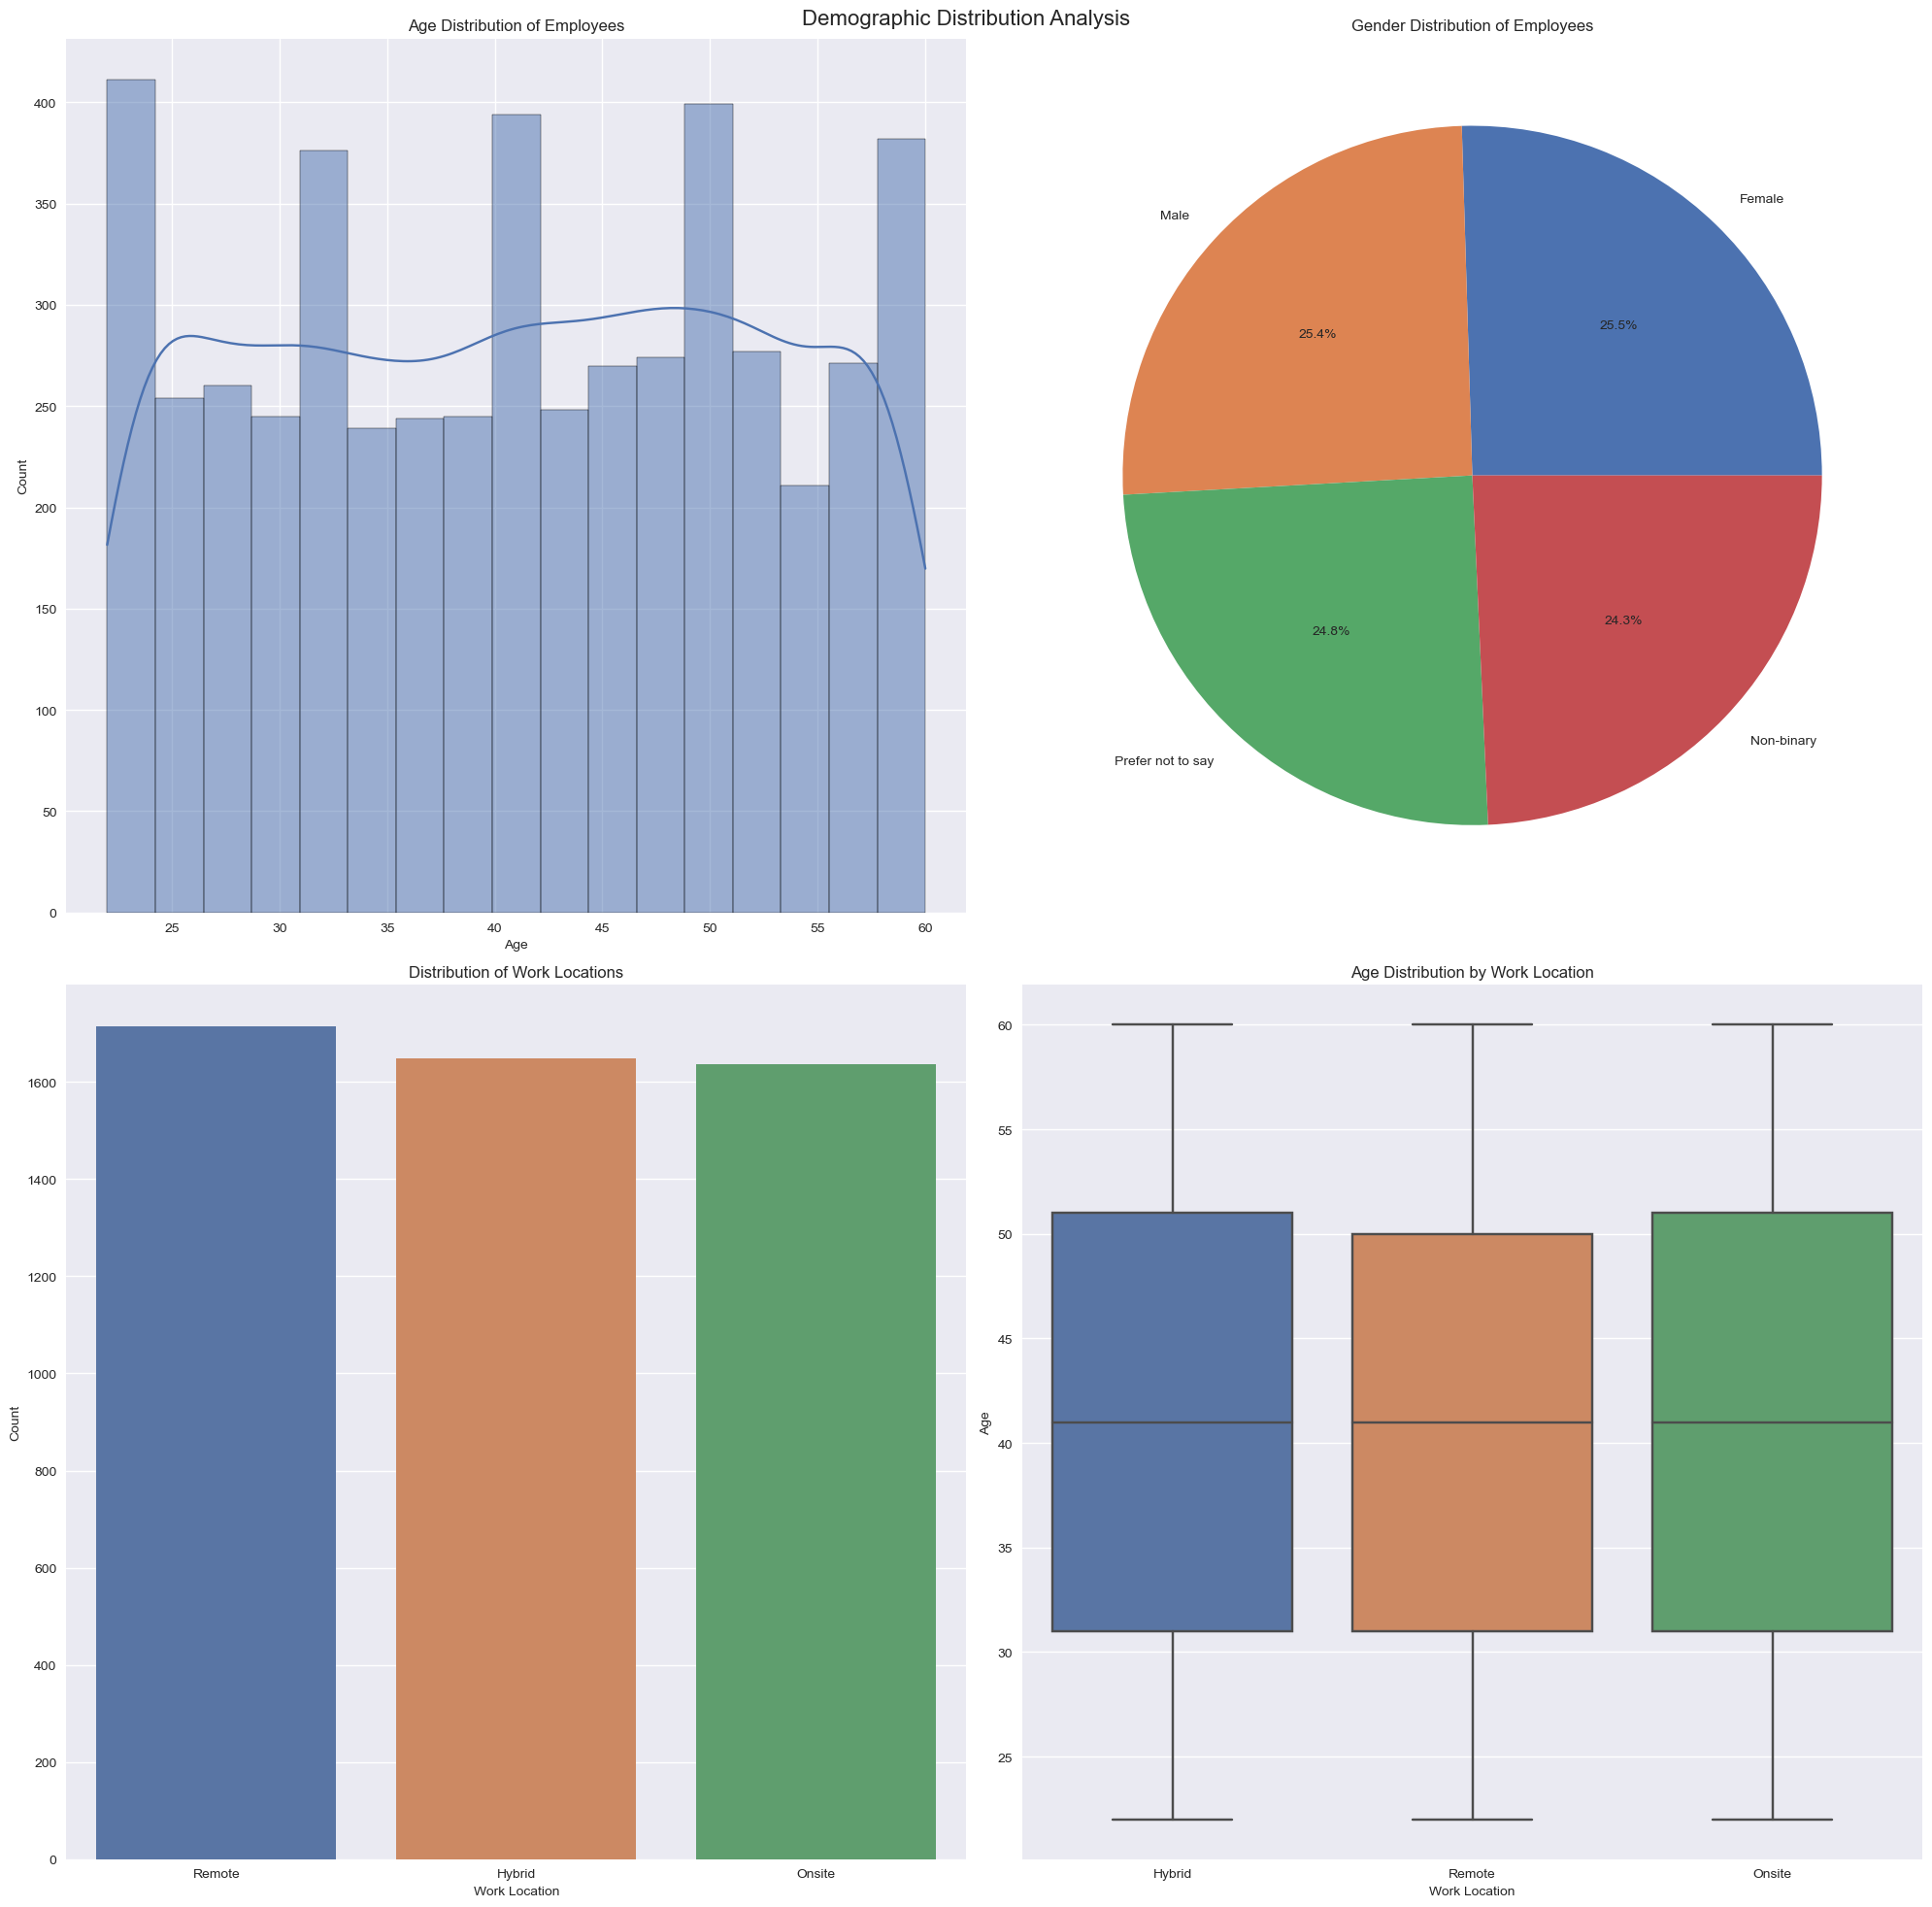

Age Statistics:
count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

Gender Distribution:
Female               0.2548
Male                 0.2540
Prefer not to say    0.2484
Non-binary           0.2428
Name: Gender, dtype: float64

Work Location Distribution:
Remote    0.3428
Hybrid    0.3298
Onsite    0.3274
Name: Work_Location, dtype: float64


In [8]:
# Set up the plotting style
plt.style.use('seaborn')
sns.set_palette("deep")

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Demographic Distribution Analysis', fontsize=16)

# 1. Age distribution
sns.histplot(data=df, x='Age', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution of Employees')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Count')

# 2. Gender breakdown
gender_counts = df['Gender'].value_counts()
axs[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Gender Distribution of Employees')

# 3. Work Location distribution
location_counts = df['Work_Location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts.values, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Work Locations')
axs[1, 0].set_xlabel('Work Location')
axs[1, 0].set_ylabel('Count')

# 4. Age distribution by Work Location
sns.boxplot(data=df, x='Work_Location', y='Age', ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution by Work Location')
axs[1, 1].set_xlabel('Work Location')
axs[1, 1].set_ylabel('Age')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Age Statistics:")
print(df['Age'].describe())

print("\nGender Distribution:")
print(df['Gender'].value_counts(normalize=True))

print("\nWork Location Distribution:")
print(df['Work_Location'].value_counts(normalize=True))